# Import Data

In [2]:
import pandas as pd
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
df = pd.read_csv('../Datasets/Solid_waste_audit_Solomon_Islands_Abundance.csv', index_col='RecordID').reset_index()
df.head()

,RecordID,UniqueID,Commercial,Date,HouseholdCommercialShip_ID,Item,Material,Measure,Multiplier,Nation,RecordDate,Site,Size,Sorter,Type,Value
0,212,459,NaN,NaN,AC01_Sol,Total sample weight (KG),NaN,Weight,1.0,Solomon,12/07/2018 00:00:00,Auki Commercial,NaN,NaN,NaN,3.948
1,212,976,NaN,NaN,AC01_Sol,Wet weight (KG),NaN,Weight,1.0,Solomon,12/07/2018 00:00:00,Auki Commercial,NaN,NaN,NaN,0.000
2,212,1493,NaN,NaN,AC01_Sol,Dry weight (KG),NaN,Weight,1.0,Solomon,12/07/2018 00:00:00,Auki Commercial,NaN,NaN,NaN,0.000
3,212,2527,NaN,NaN,AC01_Sol,Aluminium cans,Metal,Weight,1.0,Solomon,12/07/2018 00:00:00,Auki Commercial,NaN,NaN,NaN,0.000
4,212,3044,NaN,NaN,AC01_Sol,Aluminium cans,Metal,Count,1.0,Solomon,12/07/2018 00:00:00,Auki Commercial,NaN,NaN,NaN,0.000


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99437 entries, 0 to 99436
Data columns (total 16 columns):
RecordID                      99437 non-null int64
UniqueID                      99437 non-null int64
Commercial                    5400 non-null float64
Date                          6007 non-null object
HouseholdCommercialShip_ID    99437 non-null object
Item                          99437 non-null object
Material                      98244 non-null object
Measure                       99437 non-null object
Multiplier                    99437 non-null float64
Nation                        99437 non-null object
RecordDate                    99437 non-null object
Site                          79817 non-null object
Size                          58995 non-null object
Sorter                        0 non-null float64
Type                          3000 non-null object
Value                         99437 non-null float64
dtypes: float64(4), int64(2), object(10)
memory usage: 12.1+ MB


In [3]:
for column in df.columns:
    print(f'{column} - Value Counts:')
    print(df[column].value_counts(normalize=True, dropna=False).head(10))
    print(f'Unique values: {df[column].nunique()}')
    print('--------------------------------------')

RecordID - Value Counts:
148    0.007321
140    0.007321
142    0.007311
144    0.007301
138    0.007301
174    0.007291
164    0.007291
166    0.007291
134    0.007291
168    0.007291
Name: RecordID, dtype: float64
Unique values: 327
--------------------------------------
UniqueID - Value Counts:
46370    0.00002
11151    0.00002
45916    0.00002
39769    0.00002
26223    0.00002
60247    0.00002
58198    0.00002
62292    0.00002
66450    0.00002
50509    0.00002
Name: UniqueID, dtype: float64
Unique values: 80701
--------------------------------------
Commercial - Value Counts:
NaN     0.945694
 1.0    0.054306
Name: Commercial, dtype: float64
Unique values: 1
--------------------------------------
Date - Value Counts:
NaN           0.93959
12/05/2018    0.06041
Name: Date, dtype: float64
Unique values: 1
--------------------------------------
HouseholdCommercialShip_ID - Value Counts:
AH01_Sol    0.005752
C16_Sol     0.004445
S02_Sol     0.004435
H03_Sol     0.004435
C13_Sol     0.0

# Data Cleaning

## Drop Features

In [4]:
df = df.drop(['UniqueID',
         'Date',
         'Multiplier',
         'Nation',
         'Size',
         'Sorter',
         'Type'], axis=1)

In [5]:
df.head()

,RecordID,Commercial,HouseholdCommercialShip_ID,Item,Material,Measure,RecordDate,Site,Value
0,212,NaN,AC01_Sol,Total sample weight (KG),NaN,Weight,12/07/2018 00:00:00,Auki Commercial,3.948
1,212,NaN,AC01_Sol,Wet weight (KG),NaN,Weight,12/07/2018 00:00:00,Auki Commercial,0.000
2,212,NaN,AC01_Sol,Dry weight (KG),NaN,Weight,12/07/2018 00:00:00,Auki Commercial,0.000
3,212,NaN,AC01_Sol,Aluminium cans,Metal,Weight,12/07/2018 00:00:00,Auki Commercial,0.000
4,212,NaN,AC01_Sol,Aluminium cans,Metal,Count,12/07/2018 00:00:00,Auki Commercial,0.000


## Remove Uncollected Items 

In [6]:
#Remove rows without a value to only leave items actually collected per household
df = df[df.Value > 0]
df = df[df.Item != 'Total sample weight (KG)']
df.Commercial = df.Commercial.fillna(0)
df = df[df['Commercial'] == 0]
print(f'There are {len(df)} records remaining in the filtered dataset')

There are 5197 records remaining in the filtered dataset


## Determine Which Measure is most Accurate 

In [7]:
for measure in df.Measure.unique():
    print(f'There are {len(df[df.Measure == measure])} rows with the measure:', measure)

There are 1550 rows with the measure: Weight
There are 2128 rows with the measure: Count
There are 1519 rows with the measure: Volume


**Okay so we see that the measure used the most is weight, this is good as it provides the kg metric that we need to do our future calculations.  The summary of this undertaking written by CEFAS explains that 'Beverage containers were sorted and counted separately', though it does not state why.  It is clear looking at the value counts below that all items with an 'ml' in them only appear a few times as they are not repeated with the measure of 'weight' or 'volume' at all.**

**For now, let's leave out 'count' and 'volume' and continue with 'weight'.**

In [8]:
df = df[df.Measure == 'Weight']
df.head()

,RecordID,Commercial,HouseholdCommercialShip_ID,Item,Material,Measure,RecordDate,Site,Value
24,212,0.0,AC01_Sol,Cardboard,Paper and cardboard,Weight,12/07/2018 00:00:00,Auki Commercial,0.060
33,212,0.0,AC01_Sol,Paper,Paper and cardboard,Weight,12/07/2018 00:00:00,Auki Commercial,0.184
42,212,0.0,AC01_Sol,EPS,Plastic,Weight,12/07/2018 00:00:00,Auki Commercial,0.130
45,212,0.0,AC01_Sol,Plastic bags,Plastic,Weight,12/07/2018 00:00:00,Auki Commercial,0.165
54,212,0.0,AC01_Sol,Flexibles/Film,Plastic,Weight,12/07/2018 00:00:00,Auki Commercial,0.336


## Item Feature Cleaning

## Remove Low Occurring Items (< 10)

In [9]:
df['Item'].value_counts(ascending=True, dropna=False)

Lithium Batteries                                1
Mobile phones                                    1
Fishing/ seafood plastic                         1
Used lead acid batteries                         1
Hazardous                                        1
Glass fines                                      1
Feminine hygiene                                 1
Plastic oil containers                           1
Toner cartridges                                 2
Medical waste                                    2
Glass bottles win and spirt                      2
Glass bottles CDS                                3
Cigarette butts                                  3
Wood/timber                                      3
Ceramics                                         4
Other sanitary waste                             6
HDPE bottles                                     6
Metal other                                      6
Electrical items and peripherals (incl TVs)      8
Glass other                    

In [10]:
def items_to_drop(min_num, df):
    '''
    DocString!!!!
    '''
    drop_df = pd.DataFrame()
    
    drop_df['Items'] = df['Item'].value_counts(ascending=True, dropna=False).index
    drop_df['Count'] = df['Item'].value_counts(ascending=True, dropna=False).values
    
    drop_list = drop_df[drop_df['Count'] < min_num]['Items'].values
    
    return drop_list

In [11]:
drop_items= items_to_drop(10, df)
df['Item'] = df['Item'].map(lambda x:'drop' if x in drop_items else x)
df = df[df['Item'] != 'drop']
df['Item'].value_counts()

Flexibles/Film          198
Aluminium cans          175
Plastic bags            158
Food                    136
PET bottles             117
Steel cans              113
Other plastic           108
Cardboard               105
Other organics          102
Paper                    62
EPS                      47
Textles                  42
Other                    27
PP                       20
Nappies                  18
LPB                      17
Glass Jars               16
Aluminium recyclable     15
Other batteries          12
Name: Item, dtype: int64

### Most Frequent Items by Weight

In [12]:
df[df.Measure == 'Weight'].groupby("Item").sum()

,RecordID,Commercial,Value
Item,,,
Aluminium cans,21584,0.0,174.3520
Aluminium recyclable,1904,0.0,7.8650
Cardboard,13278,0.0,59.0770
EPS,5832,0.0,4.6250
Flexibles/Film,25942,0.0,65.0456
Food,19378,0.0,642.2182
Glass Jars,2647,0.0,15.0520
LPB,2315,0.0,3.4930
Nappies,1911,0.0,68.2870


## Rename 'Other' Items by Material Given

In [13]:
for material in df.Material.unique():
    print(f'{material} Value Counts:')
    print(df[df['Material'] == material]['Item'].value_counts())
    print('----------------------------------')

Paper and cardboard Value Counts:
Cardboard    105
Paper         62
LPB           17
Name: Item, dtype: int64
----------------------------------
Plastic Value Counts:
Flexibles/Film    198
Plastic bags      158
PET bottles       117
Other plastic     108
EPS                47
PP                 20
Name: Item, dtype: int64
----------------------------------
Glass Value Counts:
Glass Jars    16
Name: Item, dtype: int64
----------------------------------
Organics Value Counts:
Food              136
Other organics    102
Name: Item, dtype: int64
----------------------------------
Other Value Counts:
Textles    42
Other      27
Name: Item, dtype: int64
----------------------------------
Metal Value Counts:
Aluminium cans          175
Steel cans              113
Aluminium recyclable     15
Name: Item, dtype: int64
----------------------------------
Hygiene Value Counts:
Nappies    18
Name: Item, dtype: int64
----------------------------------
Batteries Value Counts:
Other batteries    12
Nam

In [14]:
# df.reset_index(drop=True, inplace=True)

# for material in df.Material.unique():
#     mat_items = df[df['Material'] == material]['Item'].value_counts().index
#     for item in mat_items.values:
#         if item == 'other':
#             mat_idxs = df[(df['Material'] == material) & (df['Item'] == item)].index
#             for idx in mat_idxs.values:
#                 df.iloc[idx, df.columns.get_loc('Item')] = f'other_{material}'
                
# for material in df.Material.unique():
#     print(f'{material} Value Counts:')
#     print(df[df.Material == material]['Item'].value_counts().head())
#     print('---------------------------------')

# Feature Engineering

## Total Weight per Household

**Now lets make a quick list showing all of the total waste collected per house ID.  This will be useful later after we have transformed the dataset to reflect one row per household.**

In [15]:
total_sample_df = pd.DataFrame()
total_sample_df['RecordID'] = df['RecordID'].sort_values().unique()
total_sample_df['Total_weight (kg)'] = df.groupby('RecordID').sum()['Value'].values
total_sample_df

,RecordID,Total_weight (kg)
0,1,4.9480
1,2,7.2220
2,3,12.0320
3,4,0.4520
4,5,10.8480
5,6,10.5480
6,7,2.5016
7,8,3.4140
8,9,2.1800
9,10,16.6360


## Consolidate Materials for Composition Calculations

In [16]:
df_comp = df.reset_index(drop=True)
df_comp.Material.value_counts()

Plastic                648
Metal                  303
Organics               238
Paper and cardboard    184
Other                   69
Hygiene                 18
Glass                   16
Batteries               12
Name: Material, dtype: int64

In [17]:
df_comp[df_comp['Material'] == 'Other']['Item'].value_counts()

Textles    42
Other      27
Name: Item, dtype: int64

In [18]:
# Here we are grouping 'textiles' under the paper_and_cardboard for simplicity
for idx in df_comp[df_comp['Item'] == 'Textles'].index:
    df_comp.iloc[idx, df_comp.columns.get_loc('Material')] = 'Paper and cardboard'
df_comp[df_comp['Material'] == 'Other']['Item'].value_counts()

Other    27
Name: Item, dtype: int64

In [19]:
non_combust_list = ['Metal', 'Glass', 'E-Waste', 'Batteries', 'Other']
# Consolidate all non combustable material types into one
df_comp['Material'] = df_comp['Material'].map(lambda x: 'Non_combust' if x in non_combust_list else x)
# Here we are going to bring the 'hygiene' materials under the organics category for simplicity.
df_comp.Material = df_comp.Material.map(lambda x: 'Organics' if x == 'Hygiene' else x)
df_comp['Material'].value_counts()

Plastic                648
Non_combust            358
Organics               256
Paper and cardboard    226
Name: Material, dtype: int64

**Excellent! Now we can get a feel for the composition of each household's waste and from there generate its energy potential through the Plasma Arc Gasification process.**

In [20]:
#The only important column here is "Value", ignore the rest.
df_comp.reset_index(drop=True, inplace=True)
df_comp.groupby(['RecordID', 'Material']).sum()

Commercial    Value
RecordID Material                                
1        Non_combust                 0.0   0.9060
         Organics                    0.0   3.7840
         Paper and cardboard         0.0   0.1080
         Plastic                     0.0   0.1500
2        Non_combust                 0.0   1.2320
         Organics                    0.0   5.6200
         Plastic                     0.0   0.3700
3        Non_combust                 0.0   0.4520
         Organics                    0.0  11.1840
         Paper and cardboard         0.0   0.2480
         Plastic                     0.0   0.1480
4        Organics                    0.0   0.4320
         Plastic                     0.0   0.0200
5        Organics                    0.0  10.6320
         Plastic                     0.0   0.2160
6        Non_combust                 0.0   0.0160
         Organics                    0.0  10.4840
         Plastic                     0.0   0.0480
7        Non_combust                 0.0   0.3720
         Organics                    0.0   0.6280
         Paper and cardboard         0.0   0.3640
         Plastic                     0.0   1.1376
8        Organics                    0.0   3.2600
         Plastic                     0.0   0.1540
9        Non_combust                 0.0   0.3280
         Organics                    0.0   1.0120
         Plastic                     0.0   0.8400
10       Non_combust                 0.0   0.9160
         Organics                    0.0  13.4760
         Paper and cardboard         0.0   1.8440
         Plastic                     0.0   0.4000
11       Non_combust                 0.0   0.7840
         Organics                    0.0   1.9840
         Plastic                     0.0   0.1680
12       Non_combust                 0.0   1.0040
         Organics                    0.0   2.2200
         Paper and cardboard         0.0   0.0120
         Plastic                     0.0   0.2960
13       Non_combust                 0.0   0.2080
         Organics                    0.0   6.2040
         Paper and cardboard         0.0   0.0280
         Plastic                     0.0   0.2520
14       Non_combust                 0.0   4.1160
         Plastic                     0.0   0.2840
15       Non_combust                 0.0   0.1860
         Organics                    0.0   5.4880
         Paper and cardboard         0.0   0.1360
         Plastic                     0.0   0.4280
16       Non_combust                 0.0   0.1480
         Organics                    0.0  14.2320
         Paper and cardboard         0.0   1.8400
         Plastic                     0.0   0.4720
17       Non_combust                 0.0   0.3260
         Organics                    0.0  10.9760
         Plastic                     0.0   0.3820
18       Organics                    0.0  10.3600
         Plastic                     0.0   0.0480
19       Non_combust                 0.0   0.1640
         Organics                    0.0  16.2040
         Paper and cardboard         0.0   0.1360
         Plastic                     0.0   0.1080
20       Non_combust                 0.0   0.1400
         Organics                    0.0   0.6660
         Plastic                     0.0   0.1760
22       Non_combust                 0.0   0.6820
         Organics                    0.0   9.6360
         Paper and cardboard         0.0   0.1700
         Plastic                     0.0   1.4400
23       Non_combust                 0.0   2.3880
         Organics                    0.0   1.5280
         Paper and cardboard         0.0   1.9320
         Plastic                     0.0   0.8520
24       Non_combust                 0.0  11.1160
         Organics                    0.0  18.5880
         Paper and cardboard         0.0   1.5760
         Plastic                     0.0   3.0120
25       Organics                    0.0  24.6120
         Plastic                     0.0   0.1280
26       Organics             

In [21]:
#Bring all of the composition data into a dictionary
house_comp_list = {}
for idx in df_comp.RecordID.unique():
    house_comp_list[idx] = df_comp[df_comp.RecordID == idx].groupby(['RecordID', 'Material']).sum()['Value']/df_comp[df_comp.RecordID == idx].groupby(['RecordID', 'Material']).sum()['Value'].sum()
house_comp_list

{212: RecordID  Material           
 212       Non_combust            0.033418
           Organics               0.715949
           Paper and cardboard    0.065570
           Plastic                0.185063
 Name: Value, dtype: float64, 116: RecordID  Material   
 116       Non_combust    0.019517
           Organics       0.977695
           Plastic        0.002788
 Name: Value, dtype: float64, 117: RecordID  Material           
 117       Non_combust            0.083412
           Organics               0.888152
           Paper and cardboard    0.009479
           Plastic                0.018957
 Name: Value, dtype: float64, 118: RecordID  Material           
 118       Non_combust            0.077982
           Organics               0.899083
           Paper and cardboard    0.015291
           Plastic                0.007645
 Name: Value, dtype: float64, 231: RecordID  Material   
 231       Non_combust    0.019209
           Organics       0.980791
 Name: Value, dtype: float64,

In [22]:
house_comp_list[1].keys().levels[1]

Index(['Non_combust', 'Organics', 'Paper and cardboard', 'Plastic'], dtype='object', name='Material')

In [23]:
# Create a new dataframe by extracting the appropriate information from above.
# This dataframe will be composed of waste type by wt %

df_comp_final = pd.DataFrame()
non_combust_list = []
organics_list = []
paper_list = []
plastic_list = []

for idx in df_comp.RecordID.sort_values().unique():
        if len(house_comp_list[idx].keys().levels[1]) == 4 and house_comp_list[idx].keys().levels[1][0] == 'Non_combust': 
            non_combust_list.append(house_comp_list[idx][0])
        elif len(house_comp_list[idx].keys().levels[1]) == 3 and house_comp_list[idx].keys().levels[1][0] == 'Non_combust':
            non_combust_list.append(house_comp_list[idx][0])
        elif len(house_comp_list[idx].keys().levels[1]) == 2 and house_comp_list[idx].keys().levels[1][0] == 'Non_combust':
            non_combust_list.append(house_comp_list[idx][0])
        elif len(house_comp_list[idx].keys().levels[1]) == 1 and house_comp_list[idx].keys().levels[1][0] == 'Non_combust':
            non_combust_list.append(house_comp_list[idx][0])
        else:
            non_combust_list.append(0)

for idx in df_comp.RecordID.sort_values().unique():
    if idx == 1:
        organics_list.append(house_comp_list[idx][0])
    else:
        if len(house_comp_list[idx].keys().levels[1]) == 4 and house_comp_list[idx].keys().levels[1][1] == 'Organics': 
            organics_list.append(house_comp_list[idx][1])
        elif len(house_comp_list[idx].keys().levels[1]) == 3 and house_comp_list[idx].keys().levels[1][1] == 'Organics':
            organics_list.append(house_comp_list[idx][1])
        elif len(house_comp_list[idx].keys().levels[1]) == 3 and house_comp_list[idx].keys().levels[1][0] == 'Organics':
            organics_list.append(house_comp_list[idx][0])
        elif len(house_comp_list[idx].keys().levels[1]) == 2 and house_comp_list[idx].keys().levels[1][1] == 'Organics':
            organics_list.append(house_comp_list[idx][1])
        elif len(house_comp_list[idx].keys().levels[1]) == 2 and house_comp_list[idx].keys().levels[1][0] == 'Organics':
            organics_list.append(house_comp_list[idx][0])
        elif len(house_comp_list[idx].keys().levels[1]) == 1 and house_comp_list[idx].keys().levels[1][0] == 'Organics':
            organics_list.append(house_comp_list[idx][0])
        else:
            organics_list.append(0)
        
for idx in df_comp.RecordID.sort_values().unique():
#     if idx == 1 :
#         paper_list.append(house_comp_list[idx][1][1])
#     elif idx == 2 :
#         paper_list.append(house_comp_list[idx][2][2])
#     else:
    if len(house_comp_list[idx].keys().levels[1]) == 4 and house_comp_list[idx].keys().levels[1][2] == 'Paper and cardboard':
        paper_list.append(house_comp_list[idx][2])
    elif len(house_comp_list[idx].keys().levels[1]) == 3 and house_comp_list[idx].keys().levels[1][2] == 'Paper and cardboard':
        paper_list.append(house_comp_list[idx][2])
    elif len(house_comp_list[idx].keys().levels[1]) == 3 and house_comp_list[idx].keys().levels[1][1] == 'Paper and cardboard':
        paper_list.append(house_comp_list[idx][1])        
    elif len(house_comp_list[idx].keys().levels[1]) == 2 and house_comp_list[idx].keys().levels[1][1] == 'Paper and cardboard':
        paper_list.append(house_comp_list[idx][1])
    elif len(house_comp_list[idx].keys().levels[1]) == 2 and house_comp_list[idx].keys().levels[1][0] == 'Paper and cardboard':
        paper_list.append(house_comp_list[idx][0])
    elif len(house_comp_list[idx].keys().levels[1]) == 1 and house_comp_list[idx].keys().levels[1][0] == 'Paper and cardboard':
        paper_list.append(house_comp_list[idx][0])
    else:
        paper_list.append(0)
    
for idx in df_comp.RecordID.sort_values().unique():
    if idx == 2 :
        plastic_list.append(house_comp_list[idx][2][2])
    elif idx == 3 :
        plastic_list.append(house_comp_list[idx][3][3])
    else:
        if len(house_comp_list[idx].keys().levels[1]) == 4 and house_comp_list[idx].keys().levels[1][3] == 'Plastic':
            plastic_list.append(house_comp_list[idx][3])
        elif len(house_comp_list[idx].keys().levels[1]) == 3 and house_comp_list[idx].keys().levels[1][2] == 'Plastic':
            plastic_list.append(house_comp_list[idx][2])
        elif len(house_comp_list[idx].keys().levels[1]) == 2 and house_comp_list[idx].keys().levels[1][1] == 'Plastic':
            plastic_list.append(house_comp_list[idx][1])
        elif len(house_comp_list[idx].keys().levels[1]) == 1 and house_comp_list[idx].keys().levels[1][0] == 'Plastic':
            plastic_list.append(house_comp_list[idx][0])
        else:
            plastic_list.append(0) 

print(organics_list[166])            
            
df_comp_final['ID'] = df_comp.RecordID.sort_values().unique()
df_comp_final['Organics_wt_%'] = organics_list
df_comp_final['Paper_and_cardboard_wt_%'] = paper_list
df_comp_final['Plastics_wt_%'] = plastic_list
df_comp_final['Non_combust_wt_%'] = non_combust_list
df_comp_final = pd.concat([df_comp_final, total_sample_df.drop('RecordID', axis=1)], axis=1)
df_comp_final

0


,ID,Organics_wt_%,Paper_and_cardboard_wt_%,Plastics_wt_%,Non_combust_wt_%,Total_weight (kg)
0,1,0.183104,0.021827,0.030315,0.183104,4.9480
1,2,0.778178,0.000000,0.051232,0.170590,7.2220
2,3,0.929521,0.020612,0.012301,0.037566,12.0320
3,4,0.955752,0.000000,0.044248,0.000000,0.4520
4,5,0.980088,0.000000,0.019912,0.000000,10.8480
5,6,0.993932,0.000000,0.004551,0.001517,10.5480
6,7,0.251039,0.145507,0.454749,0.148705,2.5016
7,8,0.954892,0.000000,0.045108,0.000000,3.4140
8,9,0.464220,0.000000,0.385321,0.150459,2.1800
9,10,0.810050,0.110844,0.024044,0.055061,16.6360


In [24]:
df_comp_final['Sum_check'] = df_comp_final['Organics_wt_%'] + df_comp_final['Paper_and_cardboard_wt_%'] + df_comp_final['Plastics_wt_%'] + df_comp_final['Non_combust_wt_%']
df_comp_final[df_comp_final['Sum_check'] > 1.0000000000001]
df_comp_final.drop('Sum_check', axis=1, inplace=True)

In [25]:
# # Excelllent, now we create a function to calculate the potential energy (kWh)
# # per kg of waste based off of the above MSW composition dataframe!
# def kWh_energy_conversion(organics, paper, plastics):
#     organics_form = (34.91*.73) + (117.83*.115) - (10.34*.148) - (1.51*.0004) + (10.05*.001) - (2.11*.0002)
#     paper_form = (34.91*.433) + (117.83*.058) - (10.34*.443) - (1.51*.0003) + (10.05*.0002) - (2.11*.06)
#     plastics_form = (34.91*.60) + (117.83*.072) - (10.34*.228) - (1.51*0) + (10.05*0) - (2.11*.1)
    
#     organics_total = (organics_form*organics)
#     paper_total = (paper_form*paper)
#     plastics_total = (plastics_form*plastics)
   
#     energy_mj_per_kg = organics_total + paper_total + plastics_total

#     #Now we are going to change from Mj/kg to kWh/kg for relatability.
#     energy_kWh_per_kg = energy_mj_per_kg * 0.2778
    
#     return energy_kWh_per_kg

In [26]:
# Excelllent, now we create a function to calculate the potential energy (kWh)
# per kg of waste based off of the above MSW composition dataframe!
def kWh_energy_conversion(organics, paper, plastics):
    hhv_organics_form = (34.91*.73) + (117.83*.115) - (10.34*.148) - (1.51*.004) + (10.05*.001) - (2.11*.002)
    hhv_paper_form = (34.91*.433) + (117.83*.058) - (10.34*.443) - (1.51*.003) + (10.05*.002) - (2.11*.06)
    hhv_plastics_form = (34.91*.60) + (117.83*.072) - (10.34*.228) - (1.51*0) + (10.05*0) - (2.11*.1)
    
    lhv_organics_total = (hhv_organics_form - (0.212*.115) - (0.0008*(.148+.004))) 
    lhv_paper_total = (hhv_paper_form - (0.212*.058) - (0.0008*(.148+.000)))
    lhv_plastics_total = (hhv_plastics_form - (0.212*.072) - (0.0008*(.148+0)))
                          
    nhv_organics_total = (lhv_organics_total * ((100-70)/100)) - (0.0245*0.70)
    nhv_paper_total = (lhv_paper_total * ((100-10.2)/100)) - (0.0245*0.102)
    nhv_plastics_total = (lhv_plastics_total * ((100-0.2)/100)) - (0.0245*0.002)
#     *organics)                      
                          
    nhv_organics_total = nhv_organics_total * organics
    nhv_paper_total = nhv_organics_total * paper
    nhv_plastics_total = nhv_organics_total * plastics

    energy_mj_per_kg = nhv_organics_total + nhv_paper_total + nhv_plastics_total

    #Now we are going to change from Mj/kg to kWh/kg for relatability.
    energy_kWh_per_kg = energy_mj_per_kg * 0.2778
    
    return energy_kWh_per_kg

In [27]:
# Since the above function takes the wt% values when making its calculation
# we do not need to worry about including the non_combust feature in either
# of these cells. Their impact will be treated as contributing 0 energy based on
# their respective wt% as well

df_comp_final['energy_kWh_per_kg'] = round(kWh_energy_conversion(
                                df_comp_final['Organics_wt_%'],
                                df_comp_final['Paper_and_cardboard_wt_%'],
                                df_comp_final['Plastics_wt_%']), 2)
df_comp_final.head(25)

,ID,Organics_wt_%,Paper_and_cardboard_wt_%,Plastics_wt_%,Non_combust_wt_%,Total_weight (kg),energy_kWh_per_kg
0,1,0.183104,0.021827,0.030315,0.183104,4.9480,0.60
1,2,0.778178,0.000000,0.051232,0.170590,7.2220,2.55
2,3,0.929521,0.020612,0.012301,0.037566,12.0320,2.99
3,4,0.955752,0.000000,0.044248,0.000000,0.4520,3.11
4,5,0.980088,0.000000,0.019912,0.000000,10.8480,3.12
5,6,0.993932,0.000000,0.004551,0.001517,10.5480,3.11
6,7,0.251039,0.145507,0.454749,0.148705,2.5016,1.25
7,8,0.954892,0.000000,0.045108,0.000000,3.4140,3.11
8,9,0.464220,0.000000,0.385321,0.150459,2.1800,2.01
9,10,0.810050,0.110844,0.024044,0.055061,16.6360,2.87


In [28]:
# Finally, we are going to calculate the specific amount of energy that each 
# household created based on the amount of trash that was available for pickup
# that day.
df_comp_final['total_energy_kWh'] = round(df_comp_final['energy_kWh_per_kg'] * df_comp_final['Total_weight (kg)'], 2)
df_comp_final.head()

,ID,Organics_wt_%,Paper_and_cardboard_wt_%,Plastics_wt_%,Non_combust_wt_%,Total_weight (kg),energy_kWh_per_kg,total_energy_kWh
0,1,0.183104,0.021827,0.030315,0.183104,4.948,0.60,2.97
1,2,0.778178,0.000000,0.051232,0.170590,7.222,2.55,18.42
2,3,0.929521,0.020612,0.012301,0.037566,12.032,2.99,35.98
3,4,0.955752,0.000000,0.044248,0.000000,0.452,3.11,1.41
4,5,0.980088,0.000000,0.019912,0.000000,10.848,3.12,33.85


In [29]:
df_comp_final.describe()

,ID,Organics_wt_%,Paper_and_cardboard_wt_%,Plastics_wt_%,Non_combust_wt_%,Total_weight (kg),energy_kWh_per_kg,total_energy_kWh
count,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000
mean,126.359307,0.625433,0.074643,0.125188,0.172218,8.759917,2.162511,20.552511
std,79.802070,0.342711,0.142868,0.170267,0.237123,9.140088,1.062601,25.751113
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.064000,0.000000,0.000000
25%,59.500000,0.336799,0.000000,0.021971,0.015232,2.720000,1.400000,3.560000
50%,117.000000,0.761571,0.008674,0.063033,0.069536,5.620000,2.730000,11.760000
75%,193.500000,0.928190,0.075724,0.165938,0.207238,11.781000,3.020000,27.250000
max,269.000000,1.000000,0.899387,1.000000,0.972610,59.815000,3.120000,169.870000


## Create Custom Dummy Variables with Weight Values

In [30]:
df.Item.value_counts()

Flexibles/Film          198
Aluminium cans          175
Plastic bags            158
Food                    136
PET bottles             117
Steel cans              113
Other plastic           108
Cardboard               105
Other organics          102
Paper                    62
EPS                      47
Textles                  42
Other                    27
PP                       20
Nappies                  18
LPB                      17
Glass Jars               16
Aluminium recyclable     15
Other batteries          12
Name: Item, dtype: int64

In [31]:
# Here we change the shape of our dataframe to prepare it for modeling.
for item in df.Item.unique():
    df[item] = df[df.Item == item]['Value']
dummy_df = df.groupby('RecordID').mean().drop('Value', axis=1).fillna(0).reset_index()
  
for column in dummy_df.columns:
    if column == 'RecordID':
        dummy_df = dummy_df.rename(columns={column:'ID'})
    else:
        dummy_df = dummy_df.rename(columns={column:column.lower()})
    
dummy_df.head()

,ID,commercial,cardboard,paper,eps,plastic bags,flexibles/film,other plastic,glass jars,food,textles,other organics,aluminium cans,steel cans,lpb,pp,pet bottles,nappies,aluminium recyclable,other batteries,other
0,1,0.0,0.108,0.0,0.000,0.000,0.084,0.014,0.0,0.000,0.0,3.784,0.360,0.344,0.0,0.0,0.052,0.0,0.0,0.202,0.0
1,2,0.0,0.000,0.0,0.000,0.052,0.196,0.026,0.0,0.000,0.0,5.620,0.716,0.516,0.0,0.0,0.096,0.0,0.0,0.000,0.0
2,3,0.0,0.248,0.0,0.000,0.000,0.140,0.006,0.0,11.184,0.0,0.000,0.344,0.108,0.0,0.0,0.002,0.0,0.0,0.000,0.0
3,4,0.0,0.000,0.0,0.000,0.008,0.000,0.012,0.0,0.000,0.0,0.432,0.000,0.000,0.0,0.0,0.000,0.0,0.0,0.000,0.0
4,5,0.0,0.000,0.0,0.004,0.088,0.000,0.000,0.0,0.000,0.0,10.632,0.000,0.000,0.0,0.0,0.124,0.0,0.0,0.000,0.0


In [32]:
for column in dummy_df.columns:
    print(f'{column} Value Counts:')
    print(dummy_df[column].value_counts(normalize=True, dropna=False).head())
    print('------------------------------')

ID Value Counts:
269    0.004329
87     0.004329
85     0.004329
84     0.004329
83     0.004329
Name: ID, dtype: float64
------------------------------
commercial Value Counts:
0.0    1.0
Name: commercial, dtype: float64
------------------------------
cardboard Value Counts:
0.000    0.545455
0.028    0.030303
0.032    0.017316
0.020    0.012987
0.076    0.012987
Name: cardboard, dtype: float64
------------------------------
paper Value Counts:
0.000    0.731602
0.004    0.017316
0.112    0.012987
0.168    0.012987
0.028    0.012987
Name: paper, dtype: float64
------------------------------
eps Value Counts:
0.000    0.796537
0.112    0.021645
0.040    0.017316
0.140    0.012987
0.036    0.012987
Name: eps, dtype: float64
------------------------------
plastic bags Value Counts:
0.000    0.316017
0.004    0.047619
0.020    0.017316
0.056    0.017316
0.028    0.017316
Name: plastic bags, dtype: float64
------------------------------
flexibles/film Value Counts:
0.000    0.142857
0.004 

# Create EDA DataFrame

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

In [34]:
eda_model = pd.DataFrame()

df_comp['RecordDate'] = df_comp['RecordDate'].map(lambda x: x[:8])
df_comp['RecordDate'] = pd.to_datetime(df_comp['RecordDate'])
date = []
premises_type = []
locations = []
area_type = []
frequency = []

In [35]:
for idx in df_comp.RecordID.sort_values().unique():
    date.append(df_comp[df_comp.RecordID == idx]['RecordDate'].unique()[0])
    premises_type.append(df_comp[df_comp.RecordID == idx]['Commercial'].unique().item())
    locations.append(df_comp[df_comp.RecordID == idx]['Site'].unique().item())
#     area_type.append(df_comp[df_comp.ID == idx]['Type'].unique().item())
#     frequency.append(df_comp[df_comp.ID == idx]['Collection_frequency'].unique().item())

eda_model['Date'] = date
eda_model['Commercial'] = premises_type
eda_model['Location'] = locations
# eda_model['Type'] = area_type
# eda_model['Collection_frequency'] = frequency



eda_model = pd.concat([df_comp_final,
                       eda_model['Date'],
                       eda_model['Commercial'],
                       eda_model['Location'],
#                        eda_model['Type'],
#                        eda_model['Collection_frequency'],
                       dummy_df.drop('ID', axis=1)],
                       axis=1)
eda_model.to_csv('../Datasets/Solomon - EDA_DataFrame.csv')
eda_model.head()

,ID,Organics_wt_%,Paper_and_cardboard_wt_%,Plastics_wt_%,Non_combust_wt_%,Total_weight (kg),energy_kWh_per_kg,total_energy_kWh,Date,Commercial,Location,commercial,cardboard,paper,eps,plastic bags,flexibles/film,other plastic,glass jars,food,textles,other organics,aluminium cans,steel cans,lpb,pp,pet bottles,nappies,aluminium recyclable,other batteries,other
0,1,0.183104,0.021827,0.030315,0.183104,4.948,0.60,2.97,2020-12-05,0.0,Guadalcanal,0.0,0.108,0.0,0.000,0.000,0.084,0.014,0.0,0.000,0.0,3.784,0.360,0.344,0.0,0.0,0.052,0.0,0.0,0.202,0.0
1,2,0.778178,0.000000,0.051232,0.170590,7.222,2.55,18.42,2020-12-05,0.0,Guadalcanal,0.0,0.000,0.0,0.000,0.052,0.196,0.026,0.0,0.000,0.0,5.620,0.716,0.516,0.0,0.0,0.096,0.0,0.0,0.000,0.0
2,3,0.929521,0.020612,0.012301,0.037566,12.032,2.99,35.98,2020-12-05,0.0,Guadalcanal,0.0,0.248,0.0,0.000,0.000,0.140,0.006,0.0,11.184,0.0,0.000,0.344,0.108,0.0,0.0,0.002,0.0,0.0,0.000,0.0
3,4,0.955752,0.000000,0.044248,0.000000,0.452,3.11,1.41,2020-12-05,0.0,Guadalcanal,0.0,0.000,0.0,0.000,0.008,0.000,0.012,0.0,0.000,0.0,0.432,0.000,0.000,0.0,0.0,0.000,0.0,0.0,0.000,0.0
4,5,0.980088,0.000000,0.019912,0.000000,10.848,3.12,33.85,2020-12-05,0.0,Guadalcanal,0.0,0.000,0.0,0.004,0.088,0.000,0.000,0.0,0.000,0.0,10.632,0.000,0.000,0.0,0.0,0.124,0.0,0.0,0.000,0.0


In [36]:
eda_model['Total_weight (kg)'].sum()

2023.5408000000002

# Modeling

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline
import scipy
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_predict

np.random.seed(123)

In [38]:
def item_cleaner(item, chars_to_replace, replacement):
    for idx, char in enumerate(chars_to_replace):
        item = item.replace(char, replacement[idx])
    return item

chars_to_replace = [' ',
                    '/',
                    'metal_other',
                    'other_other',
                    'other_batteries',
                    'other_glass_glass',
                    'textles',
                    'glass_jars',
                    'drinking_water_plastic_bags']

replacement = ['_',
               '_',
               'other_metal',
               'other',
               'batteries',
               'other_glass',
               'textiles',
               'jars',
               'drinkbags']

## Create Model & Train/Test Split

In [39]:
model_df = pd.concat([df_comp_final, dummy_df.drop(['ID', 'commercial'], axis=1)], axis=1)
model_df.columns = [item_cleaner(x, chars_to_replace, replacement) for x in model_df.columns]

model_df.to_csv('../Datasets/Solomon Final Model.csv')
model_df.head()

,ID,Organics_wt_%,Paper_and_cardboard_wt_%,Plastics_wt_%,Non_combust_wt_%,Total_weight_(kg),energy_kWh_per_kg,total_energy_kWh,cardboard,paper,eps,plastic_bags,flexibles_film,other_plastic,jars,food,textiles,other_organics,aluminium_cans,steel_cans,lpb,pp,pet_bottles,nappies,aluminium_recyclable,batteries,other
0,1,0.183104,0.021827,0.030315,0.183104,4.948,0.60,2.97,0.108,0.0,0.000,0.000,0.084,0.014,0.0,0.000,0.0,3.784,0.360,0.344,0.0,0.0,0.052,0.0,0.0,0.202,0.0
1,2,0.778178,0.000000,0.051232,0.170590,7.222,2.55,18.42,0.000,0.0,0.000,0.052,0.196,0.026,0.0,0.000,0.0,5.620,0.716,0.516,0.0,0.0,0.096,0.0,0.0,0.000,0.0
2,3,0.929521,0.020612,0.012301,0.037566,12.032,2.99,35.98,0.248,0.0,0.000,0.000,0.140,0.006,0.0,11.184,0.0,0.000,0.344,0.108,0.0,0.0,0.002,0.0,0.0,0.000,0.0
3,4,0.955752,0.000000,0.044248,0.000000,0.452,3.11,1.41,0.000,0.0,0.000,0.008,0.000,0.012,0.0,0.000,0.0,0.432,0.000,0.000,0.0,0.0,0.000,0.0,0.0,0.000,0.0
4,5,0.980088,0.000000,0.019912,0.000000,10.848,3.12,33.85,0.000,0.0,0.004,0.088,0.000,0.000,0.0,0.000,0.0,10.632,0.000,0.000,0.0,0.0,0.124,0.0,0.0,0.000,0.0


## Remove Outliers

In [40]:
model_df.describe()

,ID,Organics_wt_%,Paper_and_cardboard_wt_%,Plastics_wt_%,Non_combust_wt_%,Total_weight_(kg),energy_kWh_per_kg,total_energy_kWh,cardboard,paper,eps,plastic_bags,flexibles_film,other_plastic,jars,food,textiles,other_organics,aluminium_cans,steel_cans,lpb,pp,pet_bottles,nappies,aluminium_recyclable,batteries,other
count,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000
mean,126.359307,0.625433,0.074643,0.125188,0.172218,8.759917,2.162511,20.552511,0.255745,0.080260,0.020022,0.308377,0.281583,0.075519,0.065160,2.780165,0.237714,2.844022,0.754771,0.379242,0.015121,0.008069,0.236719,0.295615,0.034048,0.009887,0.077879
std,79.802070,0.342711,0.142868,0.170267,0.237123,9.140088,1.062601,25.751113,0.623693,0.280789,0.067832,0.770648,0.447328,0.276057,0.406408,4.640693,1.199221,6.371365,1.403965,0.842385,0.082925,0.044037,0.637589,2.088355,0.210875,0.046585,0.450076
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.064000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,59.500000,0.336799,0.000000,0.021971,0.015232,2.720000,1.400000,3.560000,0.000000,0.000000,0.000000,0.000000,0.024000,0.000000,0.000000,0.000000,0.000000,0.000000,0.015000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,117.000000,0.761571,0.008674,0.063033,0.069536,5.620000,2.730000,11.760000,0.000000,0.000000,0.000000,0.048000,0.100000,0.000000,0.000000,0.608000,0.000000,0.000000,0.140000,0.000000,0.000000,0.000000,0.016000,0.000000,0.000000,0.000000,0.000000
75%,193.500000,0.928190,0.075724,0.165938,0.207238,11.781000,3.020000,27.250000,0.137000,0.004000,0.000000,0.279000,0.332000,0.031000,0.000000,3.841000,0.000000,2.845000,0.672000,0.268000,0.000000,0.000000,0.216000,0.000000,0.000000,0.000000,0.000000
max,269.000000,1.000000,0.899387,1.000000,0.972610,59.815000,3.120000,169.870000,4.242000,2.408000,0.574000,6.048000,3.228000,2.898000,5.362000,29.239000,15.806000,50.302000,8.612000,6.452000,0.742000,0.378000,6.804000,28.014000,1.840000,0.356000,4.494000


### Total Weight (kg)

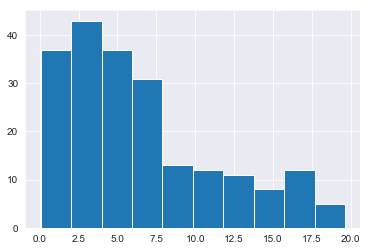

In [41]:
model_df[model_df['Total_weight_(kg)'] < 20]['Total_weight_(kg)'].hist();

In [42]:
print('Old length:', len(model_df))
print('New length:', len(model_df[model_df['Total_weight_(kg)'] < 20]))
model_df = model_df[model_df['Total_weight_(kg)'] < 20]
model_df.describe()

Old length: 231
New length: 209


,ID,Organics_wt_%,Paper_and_cardboard_wt_%,Plastics_wt_%,Non_combust_wt_%,Total_weight_(kg),energy_kWh_per_kg,total_energy_kWh,cardboard,paper,eps,plastic_bags,flexibles_film,other_plastic,jars,food,textiles,other_organics,aluminium_cans,steel_cans,lpb,pp,pet_bottles,nappies,aluminium_recyclable,batteries,other
count,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
mean,127.665072,0.617882,0.073507,0.128110,0.177718,6.451358,2.129187,14.546411,0.187541,0.063856,0.015761,0.243440,0.228529,0.041775,0.041675,2.312302,0.117541,1.823627,0.666033,0.323029,0.005828,0.004957,0.181866,0.120287,0.029593,0.007656,0.036062
std,81.128357,0.351273,0.145160,0.176516,0.242939,4.964839,1.089833,14.793311,0.447205,0.248885,0.060500,0.706067,0.393140,0.130019,0.206793,3.688316,0.511272,3.535315,1.323119,0.671666,0.040486,0.033593,0.566470,0.836878,0.195514,0.040541,0.194753
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.064000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,61.000000,0.310576,0.000000,0.021702,0.017813,2.444000,1.350000,3.030000,0.000000,0.000000,0.000000,0.000000,0.018000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,115.000000,0.761571,0.006894,0.062423,0.071346,5.058000,2.730000,9.430000,0.000000,0.000000,0.000000,0.034000,0.088000,0.000000,0.000000,0.396000,0.000000,0.000000,0.118000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,216.000000,0.929967,0.066869,0.167267,0.223311,9.324000,3.030000,20.140000,0.092000,0.004000,0.000000,0.228000,0.256000,0.026000,0.000000,3.120000,0.000000,2.056000,0.490000,0.244000,0.000000,0.000000,0.196000,0.000000,0.000000,0.000000,0.000000
max,269.000000,1.000000,0.899387,1.000000,0.972610,19.628000,3.120000,60.260000,2.352000,2.408000,0.574000,6.048000,3.228000,1.036000,2.058000,16.824000,4.376000,16.376000,8.612000,4.328000,0.532000,0.378000,6.804000,10.688000,1.840000,0.356000,2.488000


### Total Energy kWh > 0

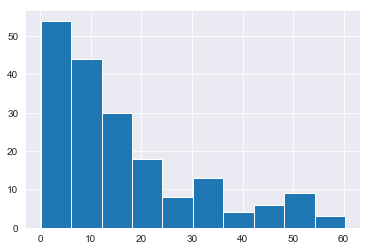

In [43]:
model_df[model_df['total_energy_kWh'] > 0]['total_energy_kWh'].hist();

In [44]:
print('Old length:', len(model_df))
print('New length:', len(model_df[model_df['total_energy_kWh'] > 0]))
model_df = model_df[model_df['total_energy_kWh'] > 0]
model_df.describe()

Old length: 209
New length: 189


,ID,Organics_wt_%,Paper_and_cardboard_wt_%,Plastics_wt_%,Non_combust_wt_%,Total_weight_(kg),energy_kWh_per_kg,total_energy_kWh,cardboard,paper,eps,plastic_bags,flexibles_film,other_plastic,jars,food,textiles,other_organics,aluminium_cans,steel_cans,lpb,pp,pet_bottles,nappies,aluminium_recyclable,batteries,other
count,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000
mean,128.412698,0.683267,0.071043,0.101200,0.141412,6.682285,2.354497,16.085714,0.181312,0.067037,0.015386,0.209212,0.222770,0.045238,0.037651,2.556990,0.123481,2.016603,0.553233,0.267402,0.006011,0.005481,0.160392,0.133016,0.032725,0.008466,0.039878
std,82.745824,0.302667,0.137458,0.124930,0.195764,5.008683,0.883615,14.738746,0.439127,0.260647,0.062120,0.604060,0.394057,0.136192,0.195826,3.797615,0.530299,3.665631,1.206944,0.580281,0.042180,0.035293,0.538048,0.879301,0.205400,0.042563,0.204477
min,1.000000,0.016018,0.000000,0.000000,0.000000,0.188000,0.100000,0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,61.000000,0.404255,0.000000,0.019912,0.013520,2.616000,1.720000,5.320000,0.000000,0.000000,0.000000,0.000000,0.022000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,114.000000,0.810050,0.008187,0.057221,0.061414,5.432000,2.780000,11.750000,0.000000,0.000000,0.000000,0.028000,0.080000,0.000000,0.000000,0.748000,0.000000,0.000000,0.112000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,219.000000,0.939444,0.064163,0.131185,0.174298,9.764000,3.040000,21.120000,0.092000,0.004000,0.000000,0.182000,0.254000,0.026000,0.000000,3.528000,0.000000,2.352000,0.348000,0.218000,0.000000,0.000000,0.172000,0.000000,0.000000,0.000000,0.000000
max,269.000000,1.000000,0.823762,0.681083,0.926819,19.628000,3.120000,60.260000,2.352000,2.408000,0.574000,5.256000,3.228000,1.036000,2.058000,16.824000,4.376000,16.376000,8.612000,4.328000,0.532000,0.378000,6.804000,10.688000,1.840000,0.356000,2.488000


##  Train/Test Split

In [45]:
X = model_df.drop(['ID',
                   'total_energy_kWh',
                   'energy_kWh_per_kg',
                   'Total_weight_(kg)',
                   'Organics_wt_%',
                   'Paper_and_cardboard_wt_%',
                   'Plastics_wt_%',
                   'Non_combust_wt_%'], axis=1)
y = model_df[['total_energy_kWh']]

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
print(X_train.shape)
print(X_test.shape)

(160, 19)
(29, 19)


In [48]:
scaler = StandardScaler()
X_train_Scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns)
X_test_Scaled = pd.DataFrame(scaler.transform(X_test), columns=X.columns)

y_train_Scaled = scaler.fit_transform(y_train)
y_test_Scaled = scaler.transform(y_test)

In [49]:
X_train_Scaled.head()

,cardboard,paper,eps,plastic_bags,flexibles_film,other_plastic,jars,food,textiles,other_organics,aluminium_cans,steel_cans,lpb,pp,pet_bottles,nappies,aluminium_recyclable,batteries,other
0,-0.432909,-0.288453,-0.252154,-0.337357,-0.538389,-0.173782,-0.21023,0.919986,-0.207977,0.088554,-0.334460,-0.468286,-0.155575,-0.169623,-0.286675,-0.129373,-0.151064,-0.201387,-0.263931
1,-0.432909,-0.003503,-0.252154,-0.331167,-0.318269,0.040357,-0.21023,-0.164374,-0.166670,-0.543155,-0.439572,-0.468286,-0.155575,-0.064836,-0.102801,-0.129373,-0.151064,-0.201387,1.929782
2,3.650644,-0.288453,-0.252154,-0.157831,-0.394833,-0.173782,-0.21023,2.771457,-0.207977,-0.543155,0.001270,-0.292216,-0.155575,-0.169623,0.060258,-0.129373,-0.151064,4.691903,-0.263931
3,-0.432909,-0.155476,-0.252154,-0.337357,-0.413973,-0.074949,-0.21023,0.043725,-0.207977,-0.543155,-0.406626,-0.050936,-0.155575,-0.169623,-0.286675,-0.129373,-0.151064,-0.201387,-0.263931
4,-0.432909,-0.288453,-0.252154,-0.337357,-0.490537,-0.338505,-0.21023,-0.108269,-0.207977,-0.543155,-0.466242,-0.468286,-0.155575,-0.169623,-0.286675,-0.129373,-0.151064,-0.201387,-0.263931


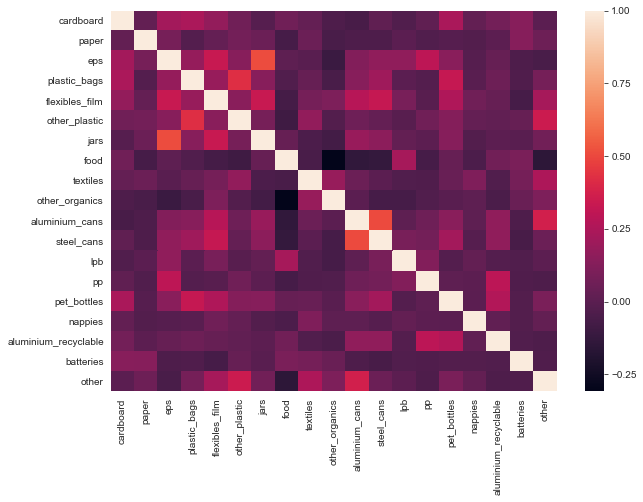

In [50]:
plt.figure(figsize=(10,7))
sns.heatmap(X_train_Scaled.corr());

In [51]:
X_train_Scaled.columns

Index(['cardboard', 'paper', 'eps', 'plastic_bags', 'flexibles_film', 'other_plastic', 'jars', 'food', 'textiles', 'other_organics', 'aluminium_cans', 'steel_cans', 'lpb', 'pp', 'pet_bottles', 'nappies', 'aluminium_recyclable', 'batteries', 'other'], dtype='object')

## Statsmodel OLS

In [52]:
from statsmodels.regression.linear_model import OLS
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import scipy.stats as stats
plt.style.use('ggplot')

X_int = sm.tools.add_constant(X)
model = OLS(y, X_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       total_energy_kWh   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     1911.
Date:                Thu, 29 Oct 2020   Prob (F-statistic):          1.75e-186
Time:                        10:24:50   Log-Likelihood:                -268.26
No. Observations:                 189   AIC:                             576.5
Df Residuals:                     169   BIC:                             641.4
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.2097      0.137     -1.533      0.127      -0.480       0.060
cardboard                1.7284      0.195      8.873      0.000       1.344       2.113
paper                    1.6549      0.360      4.595      0.000       0.944       2.366
eps                     -2.8776      1.668     -1.725      0.086      -6.171       0.416
plastic_bags             0.5634      0.154      3.657      0.000       0.259       0.868
flexibles_film           1.4123      0.239      5.905      0.000       0.940       1.884
other_plastic           -1.0421      0.730     -1.428      0.155      -2.483       0.399
jars                    -0.0306      0.486     -0.063      0.950      -0.990       0.929
food                     3.2378      0.023    140.447      0.000       3.192       3.283
textiles                 1.8833      0.159     11.850      0.000       1.570       2.197
other_organics           3.2315      0.023    139.500      0.000       3.186       3.277
aluminium_cans           0.0048      0.077      0.062      0.951      -0.148       0.157
steel_cans              -0.4026      0.165     -2.437      0.016      -0.729      -0.077
lpb                      3.6838      1.953      1.887      0.061      -0.171       7.538
pp                       0.9271      2.479      0.374      0.709      -3.967       5.821
pet_bottles              1.0856      0.163      6.660      0.000       0.764       1.407
nappies                  3.2808      0.092     35.557      0.000       3.099       3.463
aluminium_recyclable     0.4370      0.473      0.925      0.356      -0.496       1.370
batteries               -4.2162      1.880     -2.242      0.026      -7.928      -0.504
other                   -0.2108      0.399     -0.528      0.598      -0.999       0.577
==============================================================================
Omnibus:                      179.682   Durbin-Watson:                   1.559
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5678.152
Skew:                          -3.381   Prob(JB):                         0.00
Kurtosis:                      28.987   Cond. No.                         158.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
# #
# results = []
# print('Model Residuals Plot')
# print('--------------------')
# fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)
# plt.show()
# for idx, column in enumerate(X.columns):
#     print(f'Belize MSW Regression Plot for {column} Feature')
#     print('------------------------------------------------')
    
#     fig, axes = plt.subplots(figsize=(15,12))
#     fig = sm.graphics.plot_regress_exog(model, column, fig=fig)
#     fig.tight_layout()
#     plt.show()
    
#     input('Press ENTER to continue...')

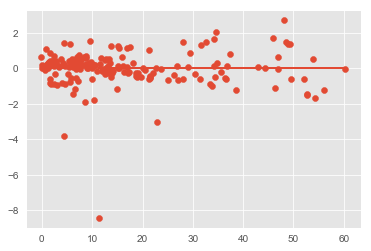

In [55]:
# Plot redisuals from Statsmodel OLS
plt.scatter(model.predict(X_int), model.resid)
plt.plot(model.predict(X_int), [0 for i in range(len(X_int))]);

## Scikit Learn LinearRegression Model

In [56]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train_Scaled, y_train_Scaled)

y_hat_train_scaled = linreg.predict(X_train_Scaled)
y_hat_test_scaled = linreg.predict(X_test_Scaled)

train_residuals = scaler.inverse_transform(y_hat_train_scaled) - y_train
test_residuals = scaler.inverse_transform(y_hat_test_scaled) - y_test

train_mse = mean_squared_error(y_train, scaler.inverse_transform(y_hat_train_scaled))
test_mse = mean_squared_error(y_test, scaler.inverse_transform(y_hat_test_scaled))

print('Train RMSE:', np.sqrt(train_mse))
print('------------------------------')
print('Test RMSE:', np.sqrt(test_mse))
linreg.score(X_test_Scaled, y_test_Scaled)

Train RMSE: 1.0393623252729622
------------------------------
Test RMSE: 1.2206989395494647


0.9929810227310967

Sklearn Model Intercept: [5.47192723e-17]


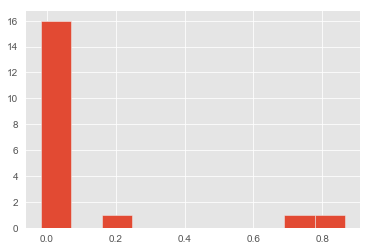

In [57]:
sklearn_results = pd.DataFrame()
sklearn_results['Item'] = [x for x in X_train_Scaled.columns]
sklearn_results['Coef'] = [x for x in linreg.coef_[0]]
print('Sklearn Model Intercept:', linreg.intercept_)
sklearn_results['Coef'].hist();

## Decision Tree Regressor

### Baseline Model

In [58]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train_Scaled, y_train_Scaled)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [59]:
from sklearn.metrics import r2_score

y_pred = regressor.predict(X_test_Scaled)
y_pred = scaler.inverse_transform(y_pred)

print('RMSE Score:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-sq Score:', r2_score(y_test, y_pred))

RMSE Score: 5.509650780597436
R-sq Score: 0.8570102697564052


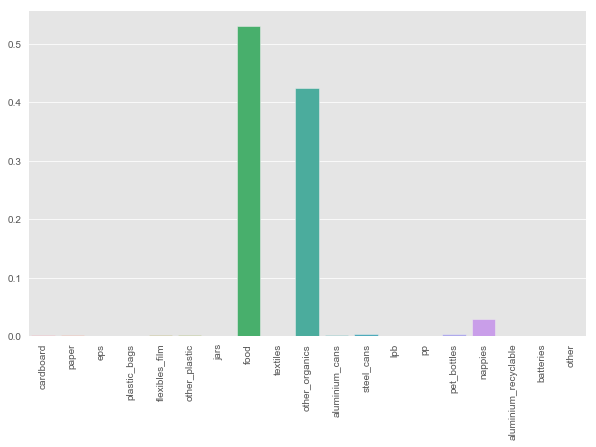

In [60]:
plt.figure(figsize=(10,6))
sns.barplot(X_train_Scaled.columns, regressor.feature_importances_, orient="v");
plt.xticks(rotation=90);

### Optimized Model

In [61]:
op_regressor = DecisionTreeRegressor(random_state=42,
                                     max_depth=4,
                                     min_samples_leaf=2,
                                     min_samples_split=4)
op_regressor.fit(X_train_Scaled, y_train_Scaled)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=2,
           min_samples_split=4, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [62]:
y_pred = op_regressor.predict(X_test_Scaled)
y_pred = scaler.inverse_transform(y_pred)

print('RMSE Score:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-sq Score:', r2_score(y_test, y_pred))

RMSE Score: 5.597935534975921
R-sq Score: 0.8523911192706481


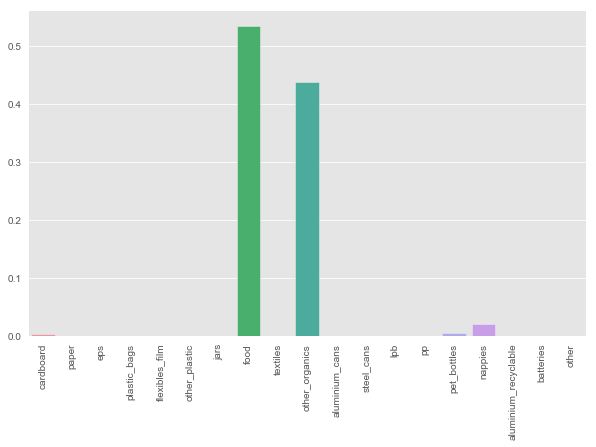

In [63]:
plt.figure(figsize=(10,6))
sns.barplot(X_train_Scaled.columns, op_regressor.feature_importances_, orient="v");
plt.xticks(rotation=90);

## Random Forest Model

In [64]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.tree import export_graphviz
from IPython.display import Image  
from pydotplus import graph_from_dot_data
import pydotplus
from sklearn.pipeline import Pipeline

### Baseline Model

In [65]:
rdm_forest = RandomForestRegressor(200, random_state=42)

In [66]:
rdm_forest.fit(X_train_Scaled, y_train_Scaled)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [67]:
rdm_forest.score(X_train_Scaled, y_train_Scaled)

0.989299728463978

In [68]:
rdm_forest.score(X_test_Scaled, y_test_Scaled)

0.8712965801647616

In [69]:
y_preds = rdm_forest.predict(X_test_Scaled)
y_preds

array([ 0.39537024, -0.57642666, -0.87791633,  1.3171909 , -0.58664067,
       -0.90807185,  0.21239758, -0.17378355,  1.17284247, -0.53187594,
        1.23980294, -0.95940725, -0.5016864 , -0.14573649,  1.12409693,
       -0.98059648, -0.34386219, -0.56808212,  2.22773013, -0.16755087,
       -0.709217  , -0.09347997, -0.56953057,  1.09730866, -0.86078752,
       -0.56962923,  1.23655051, -0.18468393,  1.99688287])

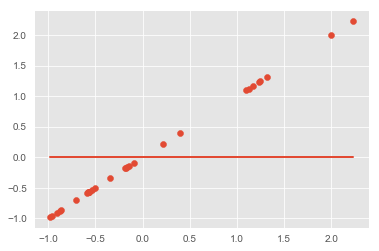

In [70]:
# Plot redisuals from Random Forest
plt.scatter(rdm_forest.predict(X_test_Scaled), y_preds)
plt.plot(rdm_forest.predict(X_test_Scaled), [0 for i in range(len(X_test_Scaled))]);

### GridSearch CV

In [71]:
rf_grid_reg = RandomForestRegressor(random_state=42)
grid_param = [{'n_estimators': [200, 250, 300],
               'max_depth': [15, 17, 20],
               'min_samples_split': [2, 3, 4],
               'min_samples_leaf': [1, 2]}]

In [72]:
# rf_gridsearch = GridSearchCV(rf_grid_reg, grid_param, cv=3)
# rf_gridsearch.fit(X_train_Scaled, y_train_Scaled)

In [73]:
# rf_gridsearch.best_params_

In [74]:
# rf_gridsearch.score(X_test_Scaled, y_test_Scaled)

In [75]:
optimal_rf_model = RandomForestRegressor(max_depth=17,
                                         min_samples_leaf=1,
                                         min_samples_split=3,
                                         n_estimators=250,
                                         random_state=42)
optimal_rf_model.fit(X_train_Scaled, y_train_Scaled)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=17,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=3,
           min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

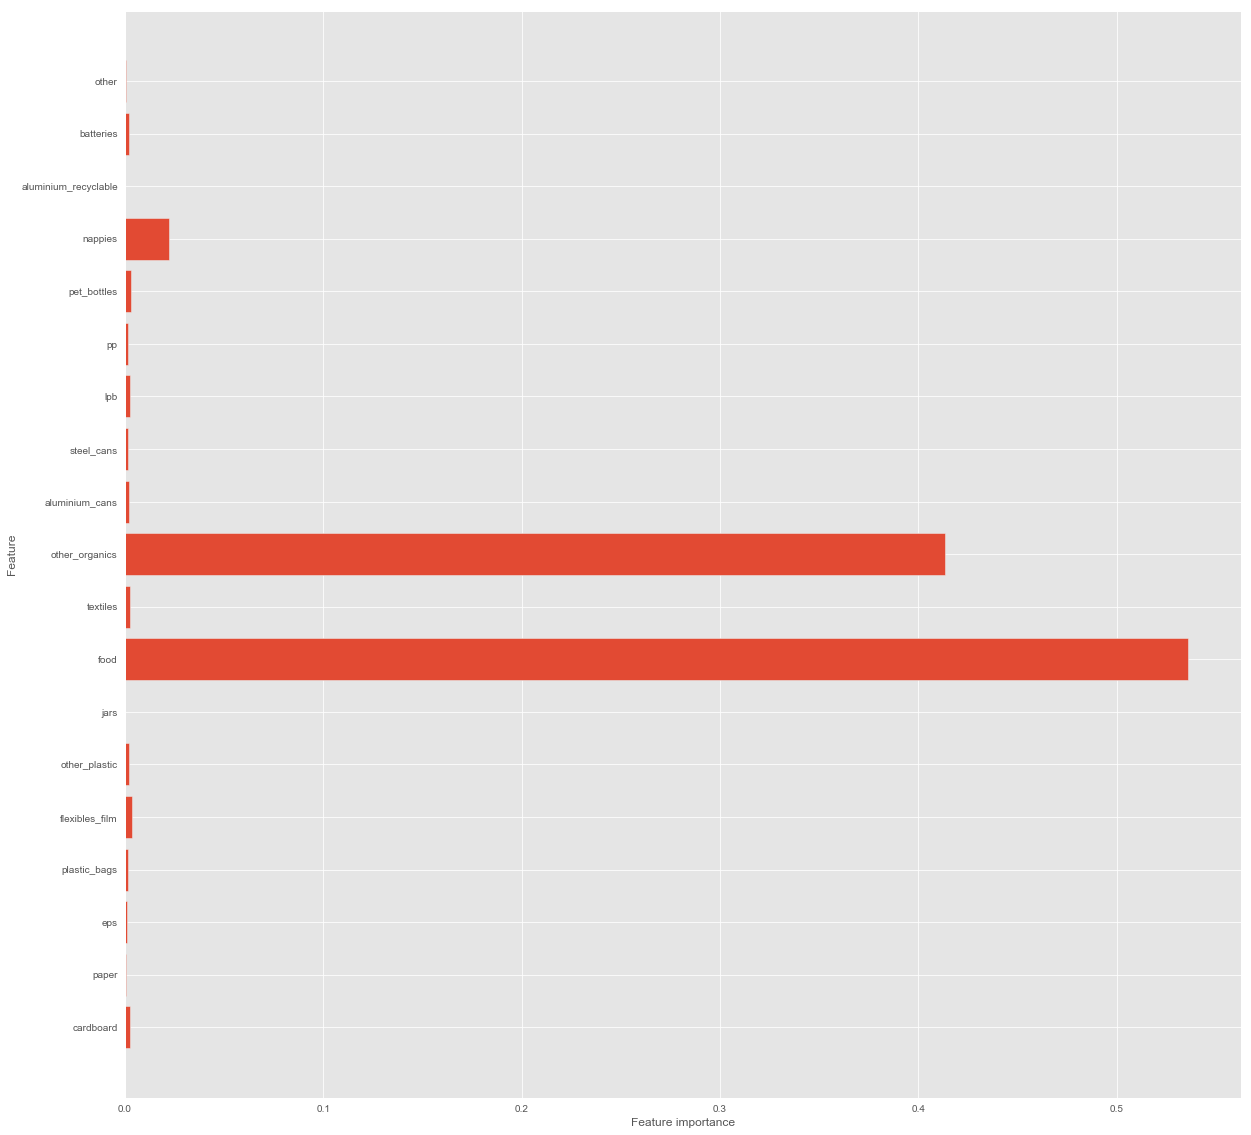

In [76]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(20,20))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(optimal_rf_model)

## MLP Regression Model

In [77]:
from keras import layers, models, optimizers, regularizers
from keras import backend as K
from keras.models import Sequential
from tensorflow.keras.callbacks import TensorBoard
from keras.wrappers.scikit_learn import KerasRegressor

In [78]:
n_features = X_train_Scaled.shape[1]

### Loss, MSE, & R^2 Visualization Function

In [79]:
def coef_determination(y_true, y_pred):
    SS_res = K.sum(K.square(y_true-y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return (1 - SS_res/(SS_tot + K.epsilon()))

In [80]:
#Build vizualization function for training/validation loss and accuracy
def visualize_loss_MSE(results):
    history = results.history
    
    plt.plot(history['loss'], 'b', label='Training Loss')
    plt.title('Training Loss')
    plt.xlabel('Epochs', fontsize=12)
    plt.ylabel('Loss', fontsize=12)
    plt.legend(loc='best')
    plt.show()
    
    plt.plot(history['mse'], 'b', label='Training MSE')
    plt.title('Training MSE')
    plt.xlabel('Epochs', fontsize=12)
    plt.ylabel('MSE', fontsize=12)
    plt.legend(loc='best')
    plt.show()
    
    plt.plot(history['coef_determination'], 'b', label='Training R^2')
    plt.title('Training R^2')
    plt.xlabel('Epochs', fontsize=12)
    plt.ylabel('R^2', fontsize=12)
    plt.legend(loc='best')
    plt.show()

### Baseline Model

In [81]:
baseline_model = Sequential()

baseline_model.add(layers.Dense(10, activation='relu', input_shape=(n_features, )))

baseline_model.add(layers.Dense(5, activation='relu'))

baseline_model.add(layers.Dense(1, activation='linear'))

baseline_model.compile(optimizer='SGD',
              loss='mse',
              metrics=['mse', coef_determination])


In [82]:
baseline_model.fit(X_train_Scaled,
                  y_train_Scaled,
                  epochs=150)

Epoch 1/150
5/5 [==============================] - 0s 745us/step - loss: 1.4396 - mse: 1.4396 - coef_determination: -0.5014
Epoch 2/150
5/5 [==============================] - 0s 1ms/step - loss: 1.1983 - mse: 1.1983 - coef_determination: -0.2039
Epoch 3/150
5/5 [==============================] - 0s 681us/step - loss: 1.0769 - mse: 1.0769 - coef_determination: -0.0919
Epoch 4/150
5/5 [==============================] - 0s 888us/step - loss: 1.0093 - mse: 1.0093 - coef_determination: -0.0540
Epoch 5/150
5/5 [==============================] - 0s 1ms/step - loss: 0.9599 - mse: 0.9599 - coef_determination: -0.0044
Epoch 6/150
5/5 [==============================] - 0s 878us/step - loss: 0.9216 - mse: 0.9216 - coef_determination: 0.0627
Epoch 7/150
5/5 [==============================] - 0s 798us/step - loss: 0.8872 - mse: 0.8872 - coef_determination: 0.0886
Epoch 8/150
5/5 [==============================] - 0s 798us/step - loss: 0.8586 - mse: 0.8586 - coef_determination: 0.1126
Epoch 9/150
5/5

5/5 [==============================] - 0s 598us/step - loss: 0.0443 - mse: 0.0443 - coef_determination: 0.9494
Epoch 133/150
5/5 [==============================] - 0s 798us/step - loss: 0.0441 - mse: 0.0441 - coef_determination: 0.9561
Epoch 134/150
5/5 [==============================] - 0s 797us/step - loss: 0.0437 - mse: 0.0437 - coef_determination: 0.9531
Epoch 135/150
5/5 [==============================] - 0s 598us/step - loss: 0.0434 - mse: 0.0434 - coef_determination: 0.9505
Epoch 136/150
5/5 [==============================] - 0s 798us/step - loss: 0.0431 - mse: 0.0431 - coef_determination: 0.9533
Epoch 137/150
5/5 [==============================] - 0s 598us/step - loss: 0.0428 - mse: 0.0428 - coef_determination: 0.9536
Epoch 138/150
5/5 [==============================] - 0s 798us/step - loss: 0.0425 - mse: 0.0425 - coef_determination: 0.9568
Epoch 139/150
5/5 [==============================] - 0s 598us/step - loss: 0.0424 - mse: 0.0424 - coef_determination: 0.9452
Epoch 140/150


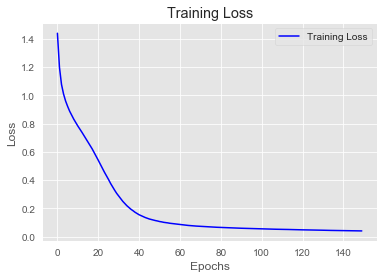

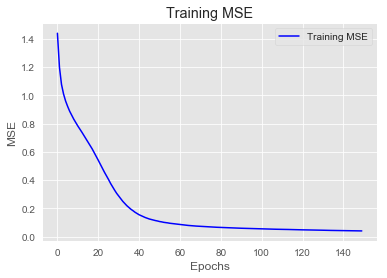

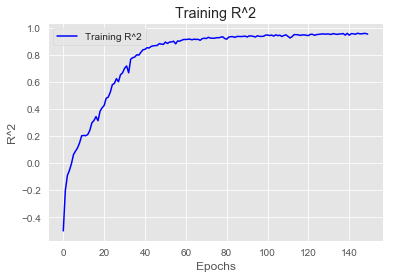

In [83]:
visualize_loss_MSE(baseline_model.history)

In [84]:
baseline_preds_scaled = baseline_model.predict(X_test_Scaled)
baseline_preds = scaler.inverse_transform(baseline_preds_scaled)
rmse = np.sqrt(mean_squared_error(y_test, baseline_preds))

print('RMSE:', rmse)
print('-------------------------')
print(baseline_model.summary())

RMSE: 4.798000440530829
-------------------------
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                200       
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 261
Trainable params: 261
Non-trainable params: 0
_________________________________________________________________
None


### Overfit Model

In [85]:
overfit_model = Sequential()

overfit_model.add(layers.Dense(10, activation='relu', input_shape=(n_features, )))

overfit_model.add(layers.Dense(10, activation='relu'))

overfit_model.add(layers.Dense(10, activation='relu'))

overfit_model.add(layers.Dense(10, activation='relu'))

overfit_model.add(layers.Dense(1, activation='linear'))

overfit_model.compile(optimizer='SGD',
              loss='mse',
              metrics=['mse', coef_determination])


In [86]:
overfit_model.fit(X_train_Scaled,
                  y_train_Scaled,
                  epochs=150,
                  batch_size=10)

Epoch 1/150
16/16 [==============================] - 0s 623us/step - loss: 1.1541 - mse: 1.1541 - coef_determination: -0.9885
Epoch 2/150
16/16 [==============================] - 0s 623us/step - loss: 0.8189 - mse: 0.8189 - coef_determination: -0.0347
Epoch 3/150
16/16 [==============================] - 0s 623us/step - loss: 0.7388 - mse: 0.7388 - coef_determination: 0.0049
Epoch 4/150
16/16 [==============================] - 0s 623us/step - loss: 0.6524 - mse: 0.6524 - coef_determination: 0.1878
Epoch 5/150
16/16 [==============================] - 0s 561us/step - loss: 0.5747 - mse: 0.5747 - coef_determination: 0.1761
Epoch 6/150
16/16 [==============================] - 0s 623us/step - loss: 0.4938 - mse: 0.4938 - coef_determination: 0.3864
Epoch 7/150
16/16 [==============================] - 0s 623us/step - loss: 0.4301 - mse: 0.4301 - coef_determination: 0.4031
Epoch 8/150
16/16 [==============================] - 0s 623us/step - loss: 0.3673 - mse: 0.3673 - coef_determination: 0.488

16/16 [==============================] - 0s 561us/step - loss: 0.0199 - mse: 0.0199 - coef_determination: 0.9732
Epoch 67/150
16/16 [==============================] - 0s 561us/step - loss: 0.0192 - mse: 0.0192 - coef_determination: 0.9673
Epoch 68/150
16/16 [==============================] - 0s 623us/step - loss: 0.0192 - mse: 0.0192 - coef_determination: 0.9753
Epoch 69/150
16/16 [==============================] - 0s 561us/step - loss: 0.0191 - mse: 0.0191 - coef_determination: 0.9766
Epoch 70/150
16/16 [==============================] - 0s 499us/step - loss: 0.0183 - mse: 0.0183 - coef_determination: 0.9684
Epoch 71/150
16/16 [==============================] - 0s 563us/step - loss: 0.0185 - mse: 0.0185 - coef_determination: 0.9735
Epoch 72/150
16/16 [==============================] - 0s 561us/step - loss: 0.0179 - mse: 0.0179 - coef_determination: 0.9739
Epoch 73/150
16/16 [==============================] - 0s 622us/step - loss: 0.0178 - mse: 0.0178 - coef_determination: 0.9711
Epoch

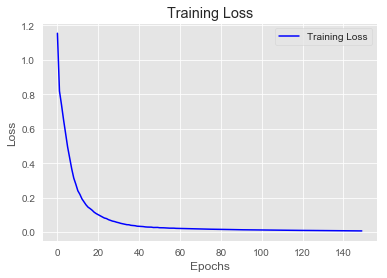

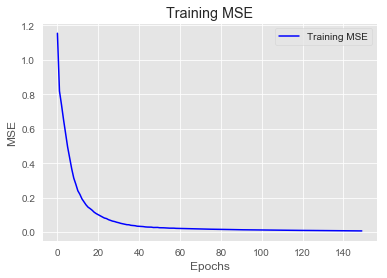

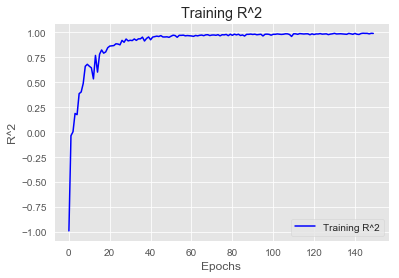

In [87]:
visualize_loss_MSE(overfit_model.history)

In [88]:
overfit_preds_scaled = overfit_model.predict(X_test_Scaled)
overfit_preds = scaler.inverse_transform(overfit_preds_scaled)
rmse = np.sqrt(mean_squared_error(y_test, overfit_preds))

print('RMSE:', rmse)
print('-------------------------')
print(overfit_model.summary())

RMSE: 10.799772481633113
-------------------------
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                200       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 11        
Total params: 541
Trainable params: 541
Non-trainable params: 0
_________________________________________________________________
None


### Regularized Model

In [89]:
reg_model = Sequential()

reg_model.add(layers.Dense(10, kernel_regularizer=regularizers.L2(0.005),
                           activation='relu', input_shape=(n_features, )))

reg_model.add(layers.Dense(10, kernel_regularizer=regularizers.L2(0.005),
                           activation='relu'))

reg_model.add(layers.Dense(10, kernel_regularizer=regularizers.L2(0.005),
                           activation='relu'))

reg_model.add(layers.Dense(10, kernel_regularizer=regularizers.L2(0.005),
                           activation='relu'))

reg_model.add(layers.Dense(10, kernel_regularizer=regularizers.L2(0.005),
                           activation='relu'))

reg_model.add(layers.Dense(1, activation='linear'))

reg_model.compile(optimizer='SGD',
              loss='mse',
              metrics=['mse', coef_determination])


In [90]:
reg_model.fit(X_train_Scaled,
                  y_train_Scaled,
                  epochs=150)

Epoch 1/150
5/5 [==============================] - 0s 793us/step - loss: 1.3066 - mse: 1.0358 - coef_determination: -0.0442
Epoch 2/150
5/5 [==============================] - 0s 598us/step - loss: 1.2729 - mse: 1.0025 - coef_determination: -0.0202
Epoch 3/150
5/5 [==============================] - 0s 798us/step - loss: 1.2446 - mse: 0.9746 - coef_determination: 0.0143
Epoch 4/150
5/5 [==============================] - 0s 999us/step - loss: 1.2220 - mse: 0.9523 - coef_determination: 0.0298
Epoch 5/150
5/5 [==============================] - 0s 997us/step - loss: 1.2036 - mse: 0.9341 - coef_determination: 0.0555
Epoch 6/150
5/5 [==============================] - 0s 798us/step - loss: 1.1881 - mse: 0.9189 - coef_determination: 0.0422
Epoch 7/150
5/5 [==============================] - 0s 787us/step - loss: 1.1753 - mse: 0.9064 - coef_determination: 0.0523
Epoch 8/150
5/5 [==============================] - 0s 797us/step - loss: 1.1575 - mse: 0.8887 - coef_determination: 0.1138
Epoch 9/150
5/

5/5 [==============================] - 0s 602us/step - loss: 0.3181 - mse: 0.0654 - coef_determination: 0.9385
Epoch 133/150
5/5 [==============================] - 0s 787us/step - loss: 0.3166 - mse: 0.0641 - coef_determination: 0.9324
Epoch 134/150
5/5 [==============================] - 0s 803us/step - loss: 0.3176 - mse: 0.0653 - coef_determination: 0.9326
Epoch 135/150
5/5 [==============================] - 0s 808us/step - loss: 0.3155 - mse: 0.0635 - coef_determination: 0.9380
Epoch 136/150
5/5 [==============================] - 0s 590us/step - loss: 0.3148 - mse: 0.0629 - coef_determination: 0.9337
Epoch 137/150
5/5 [==============================] - 0s 798us/step - loss: 0.3116 - mse: 0.0599 - coef_determination: 0.9398
Epoch 138/150
5/5 [==============================] - 0s 798us/step - loss: 0.3111 - mse: 0.0596 - coef_determination: 0.9417
Epoch 139/150
5/5 [==============================] - 0s 801us/step - loss: 0.3097 - mse: 0.0584 - coef_determination: 0.9369
Epoch 140/150


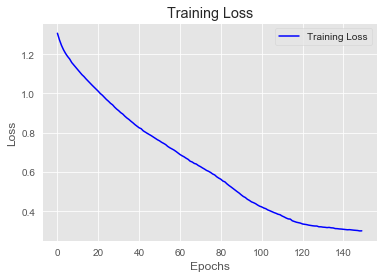

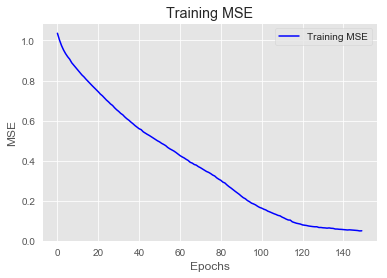

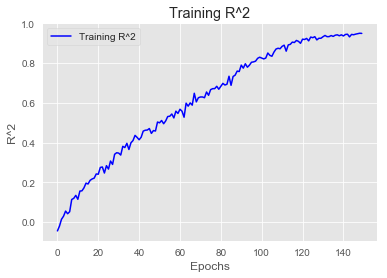

In [91]:
visualize_loss_MSE(reg_model.history)

In [92]:
reg_preds_scaled = reg_model.predict(X_test_Scaled)
reg_preds = scaler.inverse_transform(reg_preds_scaled)
rmse = np.sqrt(mean_squared_error(y_test, reg_preds))

print('RMSE:', rmse)
print('-------------------------')
print(reg_model.summary())

RMSE: 7.532051789854753
-------------------------
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 10)                200       
_________________________________________________________________
dense_9 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_10 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_11 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_12 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 11        
Total params: 651
Trainable params: 651
Non-trainable params: 0
______

### Optimized Model

In [98]:
otptimized_model = Sequential()

otptimized_model.add(layers.Dense(35,
                                  kernel_regularizer=regularizers.L2(0.005),
                           activation='relu', input_shape=(n_features, )))

otptimized_model.add(layers.Dense(15,
                                  kernel_regularizer=regularizers.L2(0.005),
                           activation='relu'))

otptimized_model.add(layers.Dense(3,
                                  kernel_regularizer=regularizers.L2(0.005),
                           activation='relu'))

otptimized_model.add(layers.Dense(1, activation='linear'))

otptimized_model.compile(optimizer='RMSprop',
              loss='mse',
              metrics=['mse', coef_determination])

In [99]:
otptimized_model.fit(X_train_Scaled,
                     y_train_Scaled,
                     epochs=150,
                     batch_size=5)

Epoch 1/150
32/32 [==============================] - 0s 749us/step - loss: 1.1835 - mse: 0.9471 - coef_determination: -0.8521
Epoch 2/150
32/32 [==============================] - 0s 715us/step - loss: 0.9750 - mse: 0.7432 - coef_determination: -3.2501
Epoch 3/150
32/32 [==============================] - 0s 748us/step - loss: 0.8236 - mse: 0.5940 - coef_determination: -0.0879
Epoch 4/150
32/32 [==============================] - 0s 686us/step - loss: 0.7109 - mse: 0.4830 - coef_determination: 0.1504
Epoch 5/150
32/32 [==============================] - 0s 654us/step - loss: 0.6329 - mse: 0.4068 - coef_determination: -0.4733
Epoch 6/150
32/32 [==============================] - 0s 686us/step - loss: 0.5842 - mse: 0.3621 - coef_determination: 0.4333
Epoch 7/150
32/32 [==============================] - 0s 686us/step - loss: 0.5505 - mse: 0.3332 - coef_determination: 0.5988
Epoch 8/150
32/32 [==============================] - 0s 686us/step - loss: 0.5257 - mse: 0.3147 - coef_determination: 0.5

32/32 [==============================] - 0s 717us/step - loss: 0.0205 - mse: 0.0038 - coef_determination: 0.9874
Epoch 131/150
32/32 [==============================] - 0s 655us/step - loss: 0.0200 - mse: 0.0034 - coef_determination: 0.9891
Epoch 132/150
32/32 [==============================] - 0s 686us/step - loss: 0.0196 - mse: 0.0031 - coef_determination: 0.9900
Epoch 133/150
32/32 [==============================] - 0s 717us/step - loss: 0.0200 - mse: 0.0036 - coef_determination: 0.9903
Epoch 134/150
32/32 [==============================] - 0s 717us/step - loss: 0.0200 - mse: 0.0036 - coef_determination: 0.9905
Epoch 135/150
32/32 [==============================] - 0s 698us/step - loss: 0.0198 - mse: 0.0034 - coef_determination: 0.9902
Epoch 136/150
32/32 [==============================] - 0s 653us/step - loss: 0.0190 - mse: 0.0027 - coef_determination: 0.9935
Epoch 137/150
32/32 [==============================] - 0s 686us/step - loss: 0.0203 - mse: 0.0041 - coef_determination: 0.993

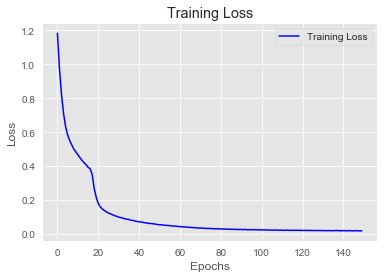

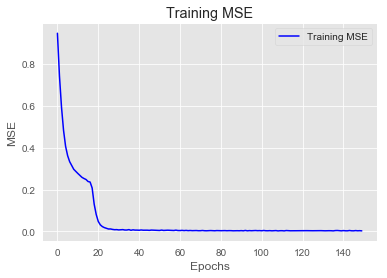

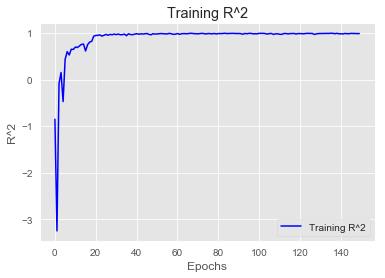

In [100]:
visualize_loss_MSE(otptimized_model.history)

In [101]:
op_preds_scaled = otptimized_model.predict(X_test_Scaled)
op_preds = scaler.inverse_transform(op_preds_scaled)
rmse = np.sqrt(mean_squared_error(y_test, op_preds))

print('RMSE:', rmse)
print('-------------------------')
print(otptimized_model.summary())

RMSE: 1.3184992024892905
-------------------------
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 35)                700       
_________________________________________________________________
dense_19 (Dense)             (None, 15)                540       
_________________________________________________________________
dense_20 (Dense)             (None, 3)                 48        
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 4         
Total params: 1,292
Trainable params: 1,292
Non-trainable params: 0
_________________________________________________________________
None
